In [3]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress

In [4]:
#Total WA sales by calendar year
revenue = "2014_to_2016_WA_revenue.csv"

revenue_df = fy2015_df = pd.read_csv(revenue)

#Preview of revenue dataframe
revenue_df.tail()

,Date,Sales,Excise Tax Due,Sales (Shelf Price)
940,12/27/2016,3324831.99,752106.45,4076938.44
941,12/28/2016,3452036.10,797870.30,4249906.40
942,12/29/2016,4200475.36,859655.24,5060130.60
943,12/30/2016,5221889.13,1243811.86,6465700.99
944,12/31/2016,3713397.08,1354076.00,5067473.08


In [5]:
#Converted Date column to series with dtype datetime64[ns]
revenue_df["Date"] = pd.to_datetime(revenue_df["Date"])

revenue_df["Date"].tail()

940   2016-12-27
941   2016-12-28
942   2016-12-29
943   2016-12-30
944   2016-12-31
Name: Date, dtype: datetime64[ns]

In [6]:
revenue_date_index = revenue_df.set_index("Date")
revenue_date_index.head()

,Sales,Excise Tax Due,Sales (Shelf Price)
Date,,,
2014-06-01,0.0,0.0,0.0
2014-06-02,0.0,0.0,0.0
2014-06-03,0.0,0.0,0.0
2014-06-04,0.0,0.0,0.0
2014-06-05,0.0,0.0,0.0


In [7]:
revenue_date_groupby = revenue_date_index.groupby(pd.Grouper(freq='M'))["Sales (Shelf Price)"].sum()
revenue_date_groupby.head()

Date
2014-06-30        6300.00
2014-07-31     3237212.69
2014-08-31     7053729.98
2014-09-30     8627392.04
2014-10-31    13051504.96
Freq: M, Name: Sales (Shelf Price), dtype: float64

In [8]:
monthly_revenue_df = pd.DataFrame({"Sales Revenue": revenue_date_groupby})
monthly_revenue_df = monthly_revenue_df.reset_index()

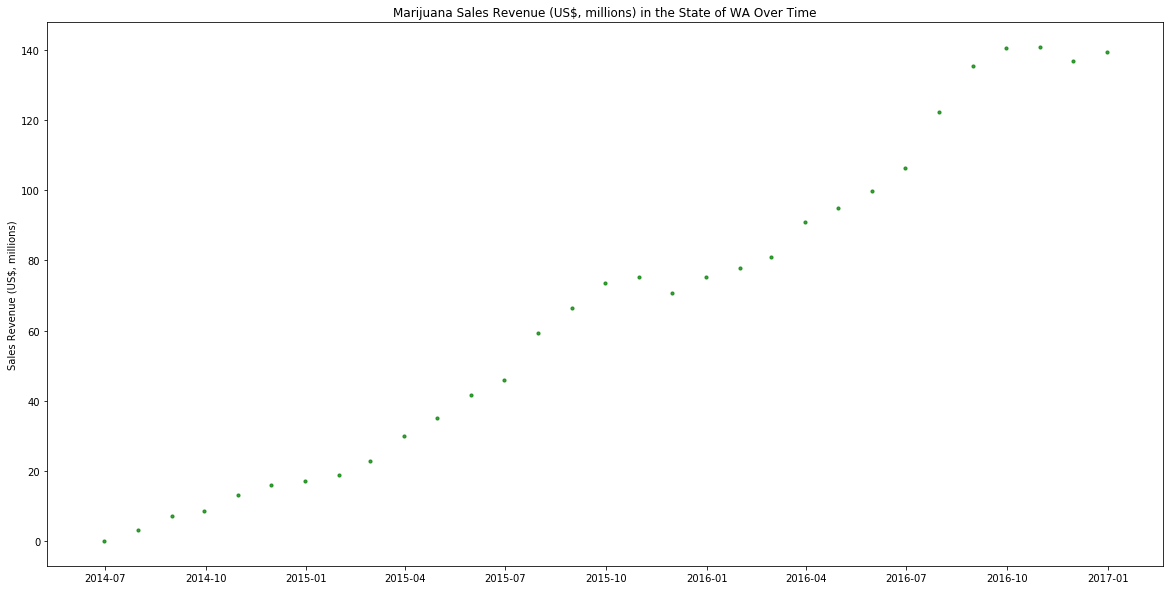

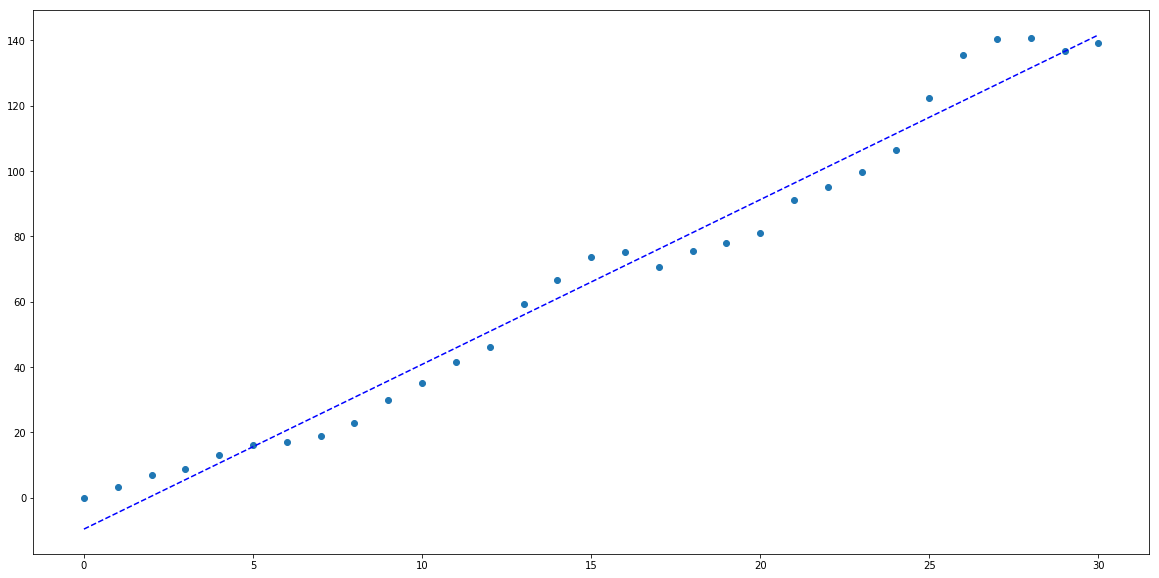

In [12]:
dates_x_axis = monthly_revenue_df["Date"].tolist()
revenue_y_axis= (monthly_revenue_df["Sales Revenue"]/1000000).tolist()

plt.scatter(dates_x_axis, revenue_y_axis, s =10, c = 'green', alpha=0.75)

plt.title("Marijuana Sales Revenue (US$, millions) in the State of WA Over Time")
#plt.xlabel("Date (Since First Sale of Marijuana)")
plt.ylabel("Sales Revenue (US$, millions)")

plt.rc('figure', figsize = (20,10))

x_axis = np.arange(0,len(dates_x_axis),1)
(slope, intercept, _, _, _) = linregress(x_axis, revenue_y_axis)
fit = slope * x_axis + intercept

fig, ax = plt.subplots()
ax.plot(x_axis, revenue_y_axis, linewidth=0, marker='o')
ax.plot(x_axis, fit, 'b--')

In [ ]:
def bins():
    bins = []
    years = [2014, 2015, 2016]
    for year in years:
        for i in range(1,13):
            month_bin = f'{i}/{year}'
            bins.append(month_bin)
    return bins

bins()

In [ ]:
#Created separate dataframes for each year from 2014 to 2016
dates_2014 = (revenue_df['Date'] > "2013-12-31") & (revenue_df['Date'] <= "2014-12-31")
dates_2015 = (revenue_df['Date'] > "2014-12-31") & (revenue_df['Date'] <= "2015-12-31")
dates_2016 = (revenue_df['Date'] > "2015-12-31") & (revenue_df['Date'] <= "2016-12-31")

revenue_2014_df = revenue_df.loc[dates_2014]
revenue_2015_df = revenue_df.loc[dates_2015]
revenue_2016_df = revenue_df.loc[dates_2016]

revenue_2014_df.tail()

In [ ]:
#Scatter plot of sales revenue in the State of WA for each day over time
dates_2014 = revenue_2014_df["Date"].tolist()
sales_2014 = revenue_2014_df["Sales (Shelf Price)"]

dates_2015 = revenue_2015_df["Date"].tolist()
sales_2015 = revenue_2015_df["Sales (Shelf Price)"]

dates_2016 = revenue_2016_df["Date"].tolist()
sales_2016 = revenue_2016_df["Sales (Shelf Price)"]

scatter_2014 = plt.scatter(dates_2014, sales_2014, s =10, c = 'lightcoral', alpha=0.75)
scatter_2015 = plt.scatter(dates_2015, sales_2015, s =10, c = 'blue', alpha=0.75)
scatter_2016 = plt.scatter(dates_2016, sales_2016, s =10, c = 'green', alpha=0.75)

plt.title("Marijuana Sales Revenue in the State of WA Over Time")
#plt.xlabel("Date (Since First Sale of Marijuana)")
plt.ylabel("Sales Revenue ($)")
plt.legend((scatter_2014, scatter_2015, scatter_2016), ('2014 Revenue', '2015 Revenue', '2016 Revenue'))

plt.ylim(0,max(sales_2016)+5)
plt.rc('figure', figsize = (20,10))

In [ ]:
#Sum of Sales(Shelf Price) for each year to find total revenue per year
revenue_2014_sum = revenue_2014_df["Sales (Shelf Price)"].sum()
revenue_2015_sum = revenue_2015_df["Sales (Shelf Price)"].sum()
revenue_2016_sum = revenue_2016_df["Sales (Shelf Price)"].sum()

revenue_sum_df = pd.DataFrame({
    "Year": ["2014", "2015", "2016"],
    "Revenue": [revenue_2014_sum, revenue_2015_sum, revenue_2016_sum]})

revenue_sum_df

In [ ]:
year = revenue_sum_df["Year"].tolist()
revenue_list = (revenue_sum_df["Revenue"]/1000000).tolist()
colors = ["lightcoral", "royalblue", "forestgreen"]
x_axis = np.arange(len(year))


plt.bar(year, revenue_list, color=colors, align="center")

plt.title("Marijuana Sales Revenue in the State of WA Since Legalization by Year")
plt.ylabel("Sales Revenue (US$, millions)")

formatted_revenue_list = ["%.2f" % revenue for revenue in revenue_list]
for i in range(len(x_axis)):
    plt.text(x = x_axis[i]-0.07, y = revenue_list[i]+15, s = formatted_revenue_list[i], size = 15)

In [ ]:
year = revenue_sum_df["Year"].tolist()
revenue = revenue_sum_df["Revenue"].tolist()

scatter_years = plt.scatter(year, revenue, s =10, c = 'lightcoral', alpha=0.75)

plt.title("Marijuana Sales Revenue in the State of WA by Year")
#plt.xlabel("Date (Since First Sale of Marijuana)")
plt.ylabel("Sales Revenue ($)")
#plt.legend((scatter_2014, scatter_2015, scatter_2016), ('2014 Revenue', '2015 Revenue', '2016 Revenue'))

#plt.ylim(0,max(sales_2016)+5)
#plt.rc('figure', figsize = (20,10))